In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0


In [ ]:
df1 = df.drop(['Unnamed: 0','key','pickup_datetime'], axis = 1)

In [ ]:
df1.isnull().sum()

,0
fare_amount,0
pickup_longitude,0
pickup_latitude,1
dropoff_longitude,1
dropoff_latitude,1
passenger_count,1


In [ ]:
df2 = df1.dropna()
df2.isnull().sum()

,0
fare_amount,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [ ]:
df = df2
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5.0


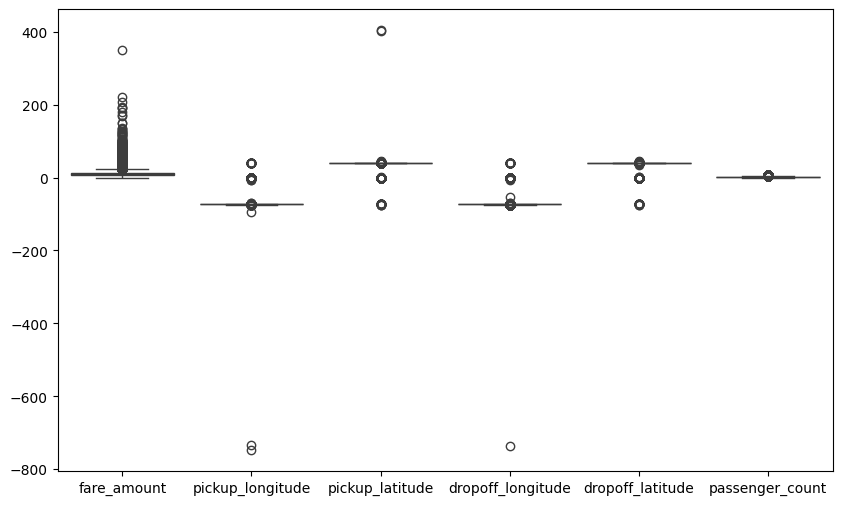

In [ ]:
#Visuliziong on box plot

plt.figure(figsize = (10,6))
sns.boxplot(data = df)
plt.show()

In [ ]:
#remove outliers
for col in df.columns:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3-Q1

  #getting lower bound and upper bound
  lb = Q1 - 1.5*IQR
  ub = Q3 + 1.5*IQR

  df = df[(df[col] >= lb) & (df[col] <= ub)]
  print(df.head())
  # df.head()

   fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0          7.5        -73.999817        40.738354         -73.999512   
1          7.7        -73.994355        40.728225         -73.994710   
2         12.9        -74.005043        40.740770         -73.962565   
3          5.3        -73.976124        40.790844         -73.965316   
4         16.0        -73.925023        40.744085         -73.973082   

   dropoff_latitude  passenger_count  
0         40.723217              1.0  
1         40.750325              1.0  
2         40.772647              1.0  
3         40.803349              3.0  
4         40.761247              5.0  
   fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0          7.5        -73.999817        40.738354         -73.999512   
1          7.7        -73.994355        40.728225         -73.994710   
2         12.9        -74.005043        40.740770         -73.962565   
3          5.3        -73.976124        40.79

In [ ]:
pip install haversine

In [ ]:
import haversine as hs
travel_dist = []
for pos in range(len(df['pickup_longitude'])):
  long1 = df['pickup_longitude'].iloc[pos]
  lati1 = df['pickup_latitude'].iloc[pos]
  long2 = df['dropoff_longitude'].iloc[pos]
  lati2 = df['dropoff_latitude'].iloc[pos]
  loc1 = (lati1 , long1)
  loc2 = (lati2 , long2)
  c = hs.haversine(loc1 , loc2)
  travel_dist.append(c)

print(travel_dist)

[1.6833250775073447, 2.4575932783467835, 5.036384146783453, 1.661685753650294, 0.0, 2.3327142314177545, 4.889423641655177, 2.2508607308770285, 3.5812557740132496, 1.3099517093917648, 1.716279792276335, 0.7299665570466272, 2.515953547298386, 1.790321726187665, 1.0347050399795192, 2.4902472008677727, 0.9594701844599927, 1.2613897673437817, 1.7517650017211177, 2.736192584061414, 0.7232537124105735, 3.229443537425455, 1.4295172964395384, 1.8950491608266506, 1.9049353402365328, 3.1821178242889583, 2.9230236888626995, 1.200213842045202, 2.635790807404098, 2.253613903554444, 4.826533532872274, 1.2502926870845612, 0.7984742276755328, 0.840396152683202, 0.38519924001701444, 2.434346176233359, 3.127909533264099, 3.7346507724526368, 4.504360509008704, 1.5579008497303448, 4.923160610490316, 7.683158068167262, 4.523573083259081, 1.1746737081325782, 1.2923819784535335, 1.21232151965934, 0.8729716749950138, 2.1074756058990856, 5.901643616945056, 0.6855640840334924, 5.634300221883286, 0.75501269300901

In [ ]:
#Uber doesn't travel over 130 kms so minimize the distance
df['dist_travel_km'] = travel_dist
df = df.loc[(df.dist_travel_km >= 1) | (df.dist_travel_km <= 130)]
print("Remaining observastions in the dataset:", df.shape)
df.head()

Remaining observastions in the dataset: (46411, 7)


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,1.683325
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,2.457593
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,5.036384
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,1.661686
5,4.9,-73.969019,40.755910,-73.969019,40.755910,1.0,0.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [ ]:
scaled_df

array([[-0.30042881, -1.11274478, -0.67510312, ..., -1.32687487,
        -0.47631582, -0.41658011],
       [-0.24949805, -0.77270436, -1.1536359 , ..., -0.11925214,
        -0.47631582,  0.06340333],
       [ 1.07470165, -1.43810571, -0.56094618, ...,  0.87516151,
        -0.47631582,  1.66204436],
       ...,
       [ 0.46353256,  2.0137883 ,  1.38777224, ..., -0.223184  ,
        -0.47631582,  1.52140171],
       [-1.19171708,  2.01786269,  2.34746266, ...,  2.07106318,
        -0.47631582, -1.10613221],
       [-0.24949805,  1.92320457,  1.56560278, ...,  0.27478015,
        -0.47631582,  0.5177546 ]])

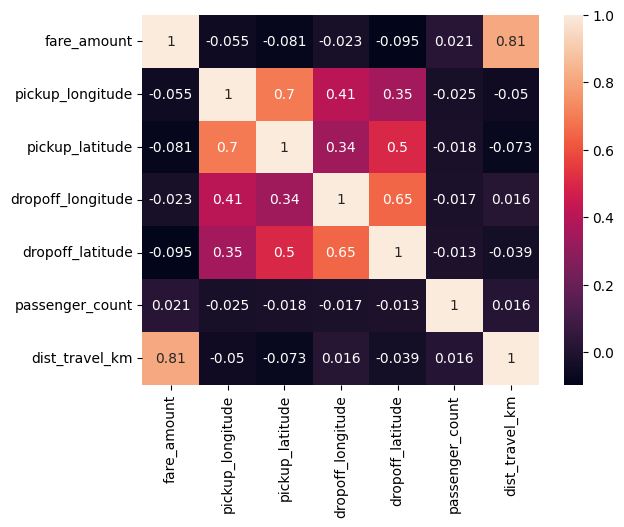

In [ ]:
sns.heatmap(data = df.corr() , annot = True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

In [ ]:
X = df[["pickup_longitude" , "pickup_latitude" , "dropoff_longitude" , "dropoff_latitude", "passenger_count"]]
y = df["fare_amount"]

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.3)

In [ ]:
model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

In [ ]:
y_pred_linear = model.predict(X_test)

In [ ]:
r2score = r2_score(y_test , y_pred_linear)
print("R2 Score: ", r2score)
rmse = np.sqrt(mean_squared_error(y_test , y_pred_linear))
print("RMSE: ",rmse)

R2 Score:  0.012803900847354277
RMSE:  3.8801137426931556


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor()
model1.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred_random = model1.predict(X_test)

In [ ]:
y_pred_random

array([ 8.858,  6.182, 13.236, ...,  4.518, 13.345,  4.757])

In [ ]:
r2score = r2_score(y_test , y_pred_random)
print("R2 Score: ", r2score)
rmse = np.sqrt(mean_squared_error(y_test , y_pred_random))
print("RMSE: ", rmse)

R2 Score:  0.6831804989198722
RMSE:  2.1981063170509207
